# Plots and Tables

With this notebook one can reproduce the plots and tables reported in our paper based on the loaded
precomputed values of `epsilon` metric. These calculations can be reproduced from scratch with `Reproduce.ipynb` notebook.

For each type of training and dataset we reproduce the following values:
- global Spearman rank correlation
- epsilon top-10% Spearman rank correlation
- global Kendall rank correlation
- epsilon top-10% Kendall rank correlation
- number of top-64 scored architectures within top-5% lowest perplexity architectures
- fraction of top-10% scored architectures belonging to top-10% lowest perplexity models

We also build plots for correlations visualisation.

In [1]:
import os
import sys
import pickle

import numpy as np
import seaborn as sns
from tqdm import tqdm
from scipy import stats

import matplotlib.pyplot as plt
from prettytable import PrettyTable

from epsilon_utils import compute_stats, plot_results

In [2]:
dataset = 'cifar10'
acc_name = 'accs'
save_dir = './release_results_ICML_11/CIFAR10/'

f = open('{}Data'.format(save_dir),'rb')
while(1):
    try:
        d = pickle.load(f)
        nparams = d['nparams']
        accs = d['test_accs_mean']
        accs_min = d['test_accs_min']
        accs_max = d['test_accs_max']
        epsilon = d['scores']
    except EOFError:
        break
f.close()

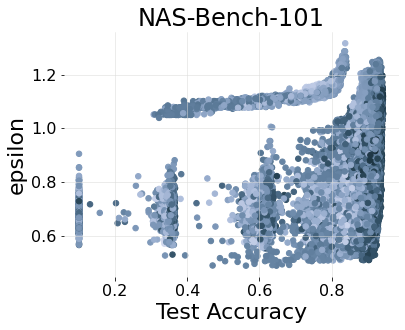

In [3]:
headers = ["Metric", "Spearman (global)", "Spearman (top-10%)", "Kendall (global)", "Kendall (top-10%)", "Top-10%/top-10%", "Top-64/top-5%"]
table = PrettyTable(headers)
if dataset=='cifar10':
    title = 'NAS-Bench-101'

# Colormap
cmap = sns.cubehelix_palette(start=2.6, rot=0.1, hue=0.7, gamma=0.8, dark=0.1, light=0.85, as_cmap=True)

accs = np.array(accs)
epsilon = np.array(epsilon)
epsilon[np.where(epsilon==0.)] = np.nan
label = 'Test Accuracy'

data, rem = compute_stats(epsilon, accs)
table.add_row(['epsilon'] + data)

# nonan = ~np.isnan(epsilon) & ~np.isnan(accs)

# keep = (accs>0.8) & (nonan)
# nparams_plt = np.array(nparams)#[keep]
# score_plt = np.array(epsilon)#[keep]
# xaxis_plt = np.array(xaxis)#[keep]
clr = np.log10(nparams)

fig = plt.figure(figsize=(6,4.5))
plt.rc('text', usetex=False)
ax = fig.add_subplot(111)
ax.scatter(accs,
           epsilon,
           s=30,
           c=clr,
           cmap=cmap,
           vmin=np.log10(np.min(nparams)),
           vmax=np.log10(np.max(nparams)),
           alpha=1
            )

# ax.set_yscale('log')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.box(on=None)
plt.grid(color='#dbdbd9', linewidth=0.5)
plt.xlabel(label, fontsize = 22)
plt.ylabel('epsilon', fontsize = 22)
plt.title(title, fontsize=24)

plt.savefig("{0}/Epsilon_{1}_Global.pdf".format(save_dir, dataset.upper()),
            bbox_inches='tight', 
            dpi=300,
            format='pdf')
plt.show()

In [4]:
table

Metric,Spearman (global),Spearman (top-10%),Kendall (global),Kendall (top-10%),Top-10%/top-10%,Top-64/top-5%
epsilon,0.52,0.17,0.36,0.12,41.67,0.00


In [35]:
table

Metric,Spearman (global),Spearman (top-10%),Kendall (global),Kendall (top-10%),Top-10%/top-10%,Top-64/top-5%
epsilon,0.34,-0.05,0.23,-0.04,24.22,7.00


In [40]:
rem

2561